# Lab4 Functions, Decorators, Functions Best Practice

На попередніх лекціях та лабораторних роботах ви вже бачили сінтаксис створення функцій, їх використання, а також пов'язані з функціями синтаксичні конструкції - анонімні функції, генератори, і т.д. В цій лабораторній роботі буде розкрита ще одна складова функцій - декоратори, також, в цій лабораторній роботі, будуть наступні теми - найкращі практики створення функцій, howtos, та невеликий гайд по asymtotic notation, для розуміння що це таке.

## Decorators

Концепт декоратора - це функція яка дозволяє 'обернути' іншу функція, розширив її функціонал, проте не змінюючи її код.

Ви вже бачили, що в процедурі виконання функції можна скористатися іншими функціями, наприклад:

In [1]:
def square(x: int or float or complex):
    return x ** 2

def get_square_area(side_length: int or float or complex):
    return square(side_length)

In [2]:
side = 5
get_square_area(side)

25

Також ми з вами знаємо що функції - це теж об'єкт і мають тип даних `function`

In [3]:
type(get_square_area)

function

І ви також бачили, що деякі функції можна передавати як аргумент для методу або іншої функції - наприклад ви використовували це з built-in функціями `map`, `sorted`, `filter` і так далі

In [4]:
qwe = list(range(10))
filter_fn = lambda x: True if x == 5 else False
list(filter(filter_fn, qwe))

[5]

Вихоячі з цього, ми можемо передати якусь функцію, як аргумент, і вона буде виконана всередині іншої функції, не змінюючи свого орігінального змісту та з можливостю додання якоїсь додаткової фукнціональності.

In [5]:
def some_fn(x):
    print('Starting the Procedure')
    x = x
    print('Returning')
    return x 

def some_other_fn(func, x):
    
    print(f"Obtained following function as an argument: {func.__name__}")
    argfunc_res = func(x)
    print("Exectuted it and returned the result")
    return argfunc_res

In [6]:
some_other_fn(some_fn, 5)

Obtained following function as an argument: some_fn
Starting the Procedure
Returning
Exectuted it and returned the result


5

Також, ми маємо змогу поставити цю функцію в `return`, тобто

In [7]:
def some_other_other_fn(func):
    
    print(f"Obtained following function as an argument: {func.__name__}")
    print("Returned function as function object!")
    return func

In [9]:
argument = 5
fn = some_other_other_fn(some_fn)
# fn(argument)

Obtained following function as an argument: some_fn
Returned function as function object!


In [10]:
fn(argument)

Starting the Procedure
Returning


5

Ми навіть можемо зробити це все наступним чином:

In [11]:
some_other_other_fn(some_fn)(argument)

Obtained following function as an argument: some_fn
Returned function as function object!
Starting the Procedure
Returning


5

Що показав код зверху? Те, що ми можемо викликати функцію `some_fn`, яку повернула `some_other_other_fn` та викликати її одразу.

Тепер трішки модіфікуємо наш код, додамо

In [12]:
def decorator_function(func):
    #
    def inner():
        
        print(f'I can see the {func} in a scope!')
        
        print('I can even execute it!')
        func()
        print('Exiting from inner procedure!')
    #
    return inner

In [14]:
decorator_fn = decorator_function(some_fn)

По факту зараз, ми створили теж саме, що і раніше, `decorator_function` 'обгорнула' функцію, яку ми передали в якості аргумента, і ми отримали цю функцію в якості змінної `decorator_fn`. Cпробуємо викликати отриманий результат.

In [15]:
decorator_fn()

I can see the <function some_fn at 0x0000017522C29A60> in a scope!
I can even execute it!


TypeError: some_fn() missing 1 required positional argument: 'x'

Закономірно, ми отримали помилку, бо ми не передали аргумент. Давайте поки, спробуємо створити функцію без аргумента, щоб подивитись на роботу декоратора.

In [17]:
def noargfn():
    print(f"\nNo arg FN Executed\n")

decorator_fn = decorator_function(noargfn)
# decorator_fn()

In [ ]:
decorator_fn()

Або альтернативно - ви можете використовувати це таким чином:

In [ ]:
decorator_fn = decorator_function(noargfn)()

Проте як отримувати результат від такої функції і як передавати аргументи? Щож, давайте створимо ще один декоратор

In [ ]:
def another_decorator(fn):
    
    def inner(*args, **kwargs):
        print("Hello from inner!")
        given_fn_result = fn(*args, **kwargs)
        print(f"Inner Executed the given function: {fn}")
        print(f"Inner Obtained a result from the function: {given_fn_result=}")
        
        return given_fn_result
    
    return inner

Як ви бачите, тепер функція-обгортка `inner`, приймає аргументи - це значить що, наприклад, якби `decorator_function` та її обгортка мали такий самий опис функції `inner`, ми би змогли передати в змінну `decorator_fn` аргументи, та отримати результат, наприклад ми би мали змогу виконати `some_fn` наступним чином:

`decorator_fn(5)` - і функція `some_fn`, яка виконується в процедурі `inner` отримала б результати.

Давайте спробуємо виконати `some_fn` користуючись функцією `another_decorator`

In [ ]:
an_decorator_fn = another_decorator(some_fn)
an_decorator_fn(5)

Таким чином, резюмуючи, декоратори, приймають як аргумент будь яку функцію, і обгортають її за допмогою внутрішної функції, в нашому прикладі - `inner`, і 'підкладуючи' замість переданої в якості аргумента функцію - функцію внутрішню, яка вже має змогу виконати функцію що була передана в якості аргумента.

Як це використовується? Наприклад вам треба знайти час, за який виконується та чи інша функція:

In [ ]:
import time

def benchmarker(fn):
    
    def _inner(*args, **kwargs):
        start = time.time()
        return_value = fn(*args, **kwargs)
        end = time.time()
        
        print(f"Function {fn.__name__} elapsed in {end - start} seconds!")
        
        return return_value
    
    return _inner

In [ ]:
def my_long_function(x):
    time.sleep(x)
    return 'DONE'

benchmarker(my_long_function)(3)

Проте це все довго і складно, робити функцію декоратора, створювати об'єкт, передавати туди аргумент і потім викликати, ще й на кожну функцію, до якої ви хочете її застосувати повторювати цей процес - не біда. Взагалі, декоратори в python використовуються, в більшості, наступним чином: замість створення і виклика оцього всього, ви можете скористатися синтаксичним сахаром `@<decorator_function>`, який має бути розташований зверху від об'явлення функції:

In [ ]:
@benchmarker
def my_long_function(x):
    time.sleep(x)
    return 'DONE!'

А потім - просто скористатися своєю функцією як ви це робили звичайно:

In [ ]:
my_long_function(2)

Наприкінці розділу про декоратори, треба зазначити деякі моменти:
* Декораторами можуть бути не лише функції, проте і класи, про які пізніше
* Використання `@` по факту 'підкладує' виконання одної функції в іншу, проте очікує що об'єкт який стоїть після `@` має приймати один аргумент, в який потрапляє те, що було обгорнуто.
* Декоратори не повинні повертати функції, вони можуть повертати що завгодно.

In [ ]:
def my_fn1(fn):
    return 'haha, no exeuction for your function'

@my_fn1
def my_fn2():
    print("I was not even executed!")
    
my_fn2

## Functions Best Practices

В практичних задачах ви могли бачити наступний синтаксис - `def foo(arg: int)` - хоча це й не є обов'язковим, проте вважається хорошою практикою вказувати який тип даних має той чи інший аргумент, бо взагалі, в особливо в великих проектах немає змоги запустити щось швиденько і продивитися що там за аргументи, тому розробники дивляться код. І вказування типів даних є великою допомогою.

In [ ]:
def my_foo(arg1: list, arg2: tuple, arg3: set):
    pass

Прийом, яким можна вказати тип даних називають `type hint` - підказка по тайпу, зверніть увагу, що через `:` треба вказувати тип даних, які є вбудовані в python. Також, цей тайпхінт можна ставити і в простому процедурному коді:

In [ ]:
a: list = []

Також - ми можемо вказати, який тип даних поверне наша функція чи метод:

In [ ]:
def foo(arg1: dict) -> dict:
    return arg1

Проте ці підказки не впливають на код, вони є дуже корисними у випадку розробки коду в IDE, а також покращують читабельність коду.

Також, для дуже дотошних розробників є бібліотека `typing`:

In [ ]:
from typing import List, Callable

def foo(arg1: List, arg2: Callable) -> Callable:
    return arg2

Ще одним моментом є можливість вказувати типи даних всередині послідовності:

In [ ]:
def foo(arg1: list[str, str, str]) -> tuple[int, int, int]:
    pass

Окремо від тайпхінтів, можливо писати для функцій опис завдяки `docstring`, ви вже таке бачили, проте виглядає це наприклад так:

In [ ]:
def _postprocess(self, output_tensor: np.ndarray) -> dict:
    """
    calculates mean over given predictions by 0 axis
    further, the weighted mean may be used or some kind of
    :param output_tensor: model run output
    :return: predictions array
    """
    self._log.debug("postprocessing starts...")
    y = np.mean(output_tensor, axis=0)  # mean over all chunks
    y = np.exp(y) / np.sum(np.exp(y))  # softmax activation
    y = [round(i, ndigits=4) for i in y.tolist()]  # numpy round does some shit when trying to change dtype to float

    pred_mapped = dict(zip(self._labelmap_list, y))  # map output according to the lablemap

    self._log.debug("postprocessing starts...DONE")
    self._log.debug(pred_mapped)

    return pred_mapped

На цьому прикладі ви можете побачити як виглядає `docstring` для функції та коментарі, які теж потрібні в деякіх функціях, проте коментарів має бути мінімальна кількість - ваш код має бути `self-description`, тобто хтось, хто буде його читати має розуміти що там відбувається і без коментарів.

При написанні функцій (а далі і методів класу) є наступні рекомендації по тому, як вони мають бути написані:

* Бути невеликими - гарним тоном в програмуванні є створення функцій від 5 до 25 рядків коду, а також відділяти деякі частини коду розривами.
* Функції мають виконувати одну задачу - 'чистою' вважається та функція, що виконує свою процедуру, відповідно до її назначення та імені, наприклад вам треба прочитати файл, переробити його контент, та записати його обратно, гарним тоном в такому разі буде зробити три (або більше) окремих фунцкій - 1 для відкриття, 2 (або більше) для обробки і третю для запису в файл.

In [ ]:
def read_edit_write(filepath: str):
    
    with open(filepath, "r") as fp:
        file_content = fp.readlines()
        
    # do some other staff 
    # do some other staff 
        # do some other staff 
    # do some other staff 
        # do some other staff 
    # do some other staff 
        # do some other staff 
    # do some other staff 
        # do some other staff 
    # do some other staff 
        # do some other staff 
    # do some other staff     # do some other staff 
    # do some other staff 
        # do some other staff 
    # do some other staff 
    somedata = None
    
    with open(filepath, "w") as fp:
        fp.writelines(some_data)

Замість цього краще зробити:

In [ ]:
def read_file(filepath):
    pass

def edit_data(data):
    pass

def write_data(filepath):
    pass

def main(filepath):
    raw_data = read_file(filepath)
    edited_data = edit_data(raw_data)
    writed_filepath = write_data(filepath)
    return writed_filepath

* Мати процедуру коду, на тому ж самому рівні абстрації, що і її назва. 

Наприклад - якщо ви пишете якусь математичну функцію, ви можете користуватися математичною нотацією, наприклад:

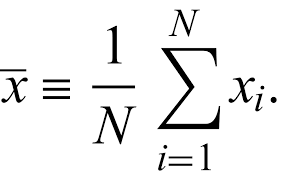

In [ ]:
def mean(x: list) -> float:
    N = len(x)
    Sum = sum(x)
    u = (1 / N) * Sum
    return u

Або, якщо ви пишете код проекту, і вирішили мати назви змінних, що описують дані в цих змінних:

In [ ]:
def get_data_from_grades_file(grades_file_path: str):
    grades_file_contents = read_my_file_contents(grades_file_path)
    grades_file_contents_dict_by_name = parse_grades_files_by_name()
    # et cetera et cetera
    return filtered_grades_data_list

Тобто - якщо ви пишете якийсь код сімуляцій, дотримуйтесь того уровня абстракії з якого почали, у другому випадку, коли функції та змінні мають широку розкриваючу їх назву, не треба зводити назві змінних до одного симбола і так далі.

* Функція має мати не більше 4 - 5 аргументів

Тут все виходить із чистого здравого сенсу - функція з великою кількістю аргументів погано читається, якщо вам прям таки треба використати всі значення - передайте їх за допомогою словника чи ліста. Також - велика кількість аргументів накладає підозру, що функція не є чистою - тобто робить декілька справ одночасно, що вважається bad practice

contain code with the same level of abstraction
have fewer than 4 arguments



* Код функцій не має мати в собі дублікати

Якщо вам кров із носу треба повторити якийсь код, який вже є в одній функції в іншій - краще просто створіть нову функцію, і виконайте її в тих випадках, де потрібно

* Мати читку назву, яка може розказати нащо ця функція потрібна:

In [ ]:
# do
def read_grades_file():
    pass

def calculate_average_weight():
    pass

def get_cumulative_sum():
    pass


# don`t 

def readfile():
    pass

def avgw():
    pass

def get_cumulative_summary_of_given_integer_sequence_of_addictive_numbers():
    pass